# 1

In [ ]:
import torch
import numpy as np
x = torch.tensor(torch.arange(-6.0,1.0,0.0001),requires_grad = True)
y = 3*x - 6*x**3 - x**4 + 4

for i in range(0,x.size(0)):
    tensor_y = y ## defining y tensor
    
for i in range(0,y.size(0)):
        y[i].backward(retain_graph = True)
grad = x.grad #dy/dx 3 - 18x^2 - 4x^3

In [133]:
index_grad = torch.where(torch.abs(grad)<=0.01)#close to zero dy/dx
for i in index_grad:
    local_minima_x = x[i]
for i in index_grad:
    local_minima_y = y[i]

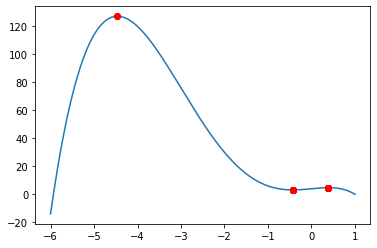

In [134]:
import matplotlib.pyplot as plt
plt.plot(x.detach().numpy(), tensor_y.detach().numpy(), label='grad')
#plt.plot(x.detach().numpy(), x.grad.detach().numpy(), label='grad')
for i in range(0,local_minima_y.size(0)):
    plt.plot(local_minima_x[i].detach().numpy() ,local_minima_y[i].detach().numpy(),'ro')
plt.show()

# 2

In [151]:
import torch
import numpy as np
import math 
from tqdm  import tqdm

x = torch.tensor(np.linspace(start = -math.pi, stop = math.pi, num = 1000), requires_grad = True)
y = torch.tensor(np.linspace(start = -math.pi, stop = math.pi, num = 1000), requires_grad = True)
z = torch.cos(x_single)*torch.sin(y_single)

In [152]:
gradx = []
grady = []
x_y = []
for i in tqdm(x):
     for j in y:
        x_single = torch.tensor(i,requires_grad = True)
        y_single = torch.tensor(j,requires_grad = True)   
        z = torch.cos(x_single)*torch.sin(y_single)
        z.backward()
        x_y.append((i,j))
        gradx.append(x_single.grad)
        grady.append(y_single.grad)

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-152-2bca61317791>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_single = torch.tensor(i,requires_grad = True)
<ipython-input-152-2bca61317791>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_single = torch.tensor(j,requires_grad = True)
100%|██████████| 1000/1000 [01:31<00:00, 10.91it/s]


In [153]:
dzdx = torch.abs(torch.FloatTensor(gradx))
dzdy = torch.abs(torch.FloatTensor(grady))
xy_val = torch.FloatTensor(x_y)

dzdx_zero = np.where(dzdx<=0.01)
dzdy_zero = np.where(dzdy<=0.01)

In [154]:
final_points=[]
for i in tqdm(dzdx_zero[0]):
    for j in dzdy_zero[0]:
        if((torch.equal(xy_val[i],xy_val[j])) == True):
                final_points.append(xy_val[j])

100%|██████████| 30448/30448 [1:00:54<00:00,  8.33it/s]


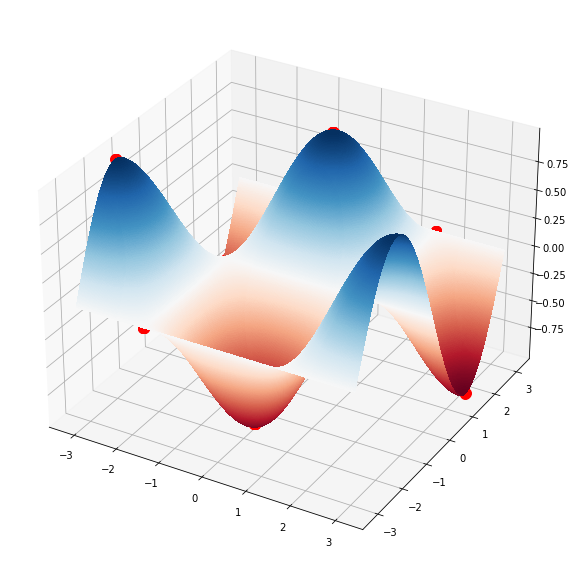

In [155]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

x = np.linspace(start = -math.pi, stop = math.pi, num = 1000)
y = np.linspace(start = -math.pi, stop = math.pi, num = 1000)
X,Y = meshgrid(x, y) 
Z = np.cos(X)*np.sin(Y) 


fig = plt.figure(figsize=(10.,50.))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=2, 
                      cmap=cm.RdBu, antialiased=False)
for i in range(0, len(final_points)):
    z_zero = np.cos(final_points[i][0])*np.sin(final_points[i][1])
    plt.plot(final_points[i][0].detach().numpy() ,final_points[i][1].detach().numpy(), 
             z_zero.detach().numpy(),'ro',markersize=10)

plt.show()